In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Score.csv')
df

,student_id,mathematics,literature,english,physics,chemistry,biology,history,geography,civic_education,Year,Score,Grade,code,province
0,1000043,8.0,8.50,8.8,NaN,NaN,NaN,5.75,6.50,8.75,2021,25.30,D01,1,Hà Nội
1,1000007,9.0,5.25,9.0,7.25,4.75,3.5,NaN,NaN,NaN,2021,25.25,A01,1,Hà Nội
2,1000180,8.8,8.50,9.6,NaN,NaN,NaN,5.25,7.25,8.00,2021,26.90,D01,1,Hà Nội
3,1000162,9.2,6.50,9.8,9.00,5.75,6.0,NaN,NaN,NaN,2021,28.00,A01,1,Hà Nội
4,1000149,7.8,7.25,6.8,NaN,NaN,NaN,4.75,6.75,7.25,2021,21.85,D01,1,Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676203,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00,2022,20.00,C00,64,Hậu Giang
1676204,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50,2022,19.50,C00,64,Hậu Giang
1676205,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00,2022,21.25,C00,64,Hậu Giang
1676206,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75,2022,22.75,C00,64,Hậu Giang


HISTOGRAM

C:\Users\NgocHoa\AppData\Local\Temp\ipykernel_4112\539550310.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.kdeplot(data=df, x='Score', hue='Year', bw_adjust=2, palette=["C1", "C2", "C4"])


<Axes: xlabel='Score', ylabel='Density'>

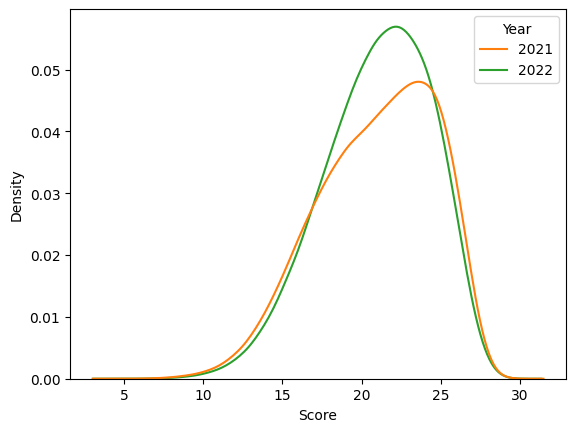

In [25]:
sns.kdeplot(data=df, x='Score', hue='Year', bw_adjust=2, palette=["C1", "C2"])

C:\Users\NgocHoa\AppData\Local\Temp\ipykernel_4112\3378303554.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.kdeplot(data=df, x='mathematics', hue='Year', bw_adjust=2, palette=["C1", "C2", "C4"])


<Axes: xlabel='mathematics', ylabel='Density'>

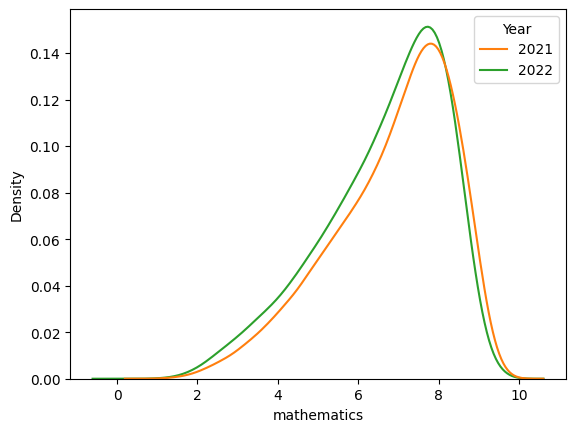

In [26]:
sns.kdeplot(data=df, x='mathematics', hue='Year', bw_adjust=2, palette=["C1", "C2"])

C:\Users\NgocHoa\AppData\Local\Temp\ipykernel_4112\2533753739.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.kdeplot(data=df, x='literature', hue='Year', bw_adjust=2, palette=["C1", "C2", "C4"])


<Axes: xlabel='literature', ylabel='Density'>

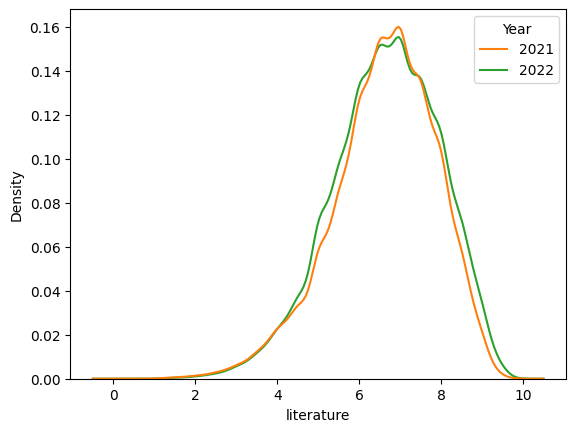

In [27]:
sns.kdeplot(data=df, x='literature', hue='Year', bw_adjust=2, palette=["C1", "C2"])

<Axes: xlabel='english', ylabel='Density'>

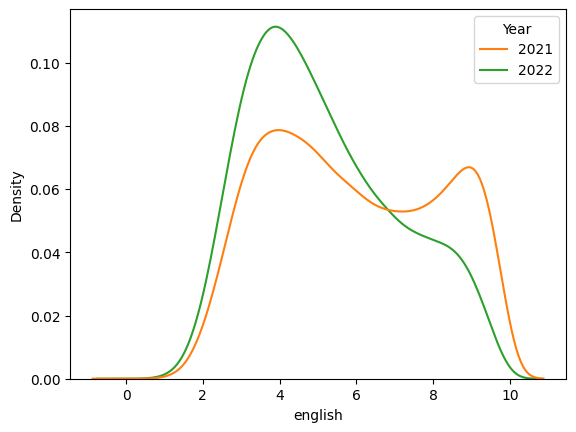

In [29]:
sns.kdeplot(data=df, x='english', hue='Year', bw_adjust=2, palette=["C1", "C2"])

MAP

In [59]:
import geopandas as gpd
map_df = gpd.read_file('./diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [60]:
# Fix some typo errors
map_df.loc[44, 'ten_tinh'] = 'Quảng Bình'
map_df.loc[31, 'ten_tinh'] = 'Kiên Giang'
map_df.loc[12, 'ten_tinh'] = 'Cần Thơ'

In [61]:
# Only care year 2022
df_2022 = df[df['Year'] == 2022]

In [62]:
# Function to merge map_df
def merge_df(subject_name, map_df, df_2022):
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].mean(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_avg'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].std(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_std'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].apply(lambda x: (x >= 27).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_>=27'}, inplace=True)
    return map_df

In [63]:
# Create statistics
for subject_name in ['Score']:
    map_df = merge_df(subject_name, map_df, df_2022)

map_df

,gid,code,ten_tinh,geometry,Score_avg,Score_std,Score_>=27
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",21.226668,2.936254,0.008967
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",20.899470,3.159496,0.006564
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",21.644521,3.104613,0.022090
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",20.314146,3.425820,0.012805
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",21.290669,2.867070,0.010631
...,...,...,...,...,...,...,...
58,59,AD01,Trà Vinh,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ...",18.751105,3.374868,0.002301
59,60,AD01,Tuyên Quang,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ...",20.532931,3.163343,0.011748
60,61,AD01,Vĩnh Long,"MULTIPOLYGON (((106.02713 10.28630, 106.02695 ...",20.451921,2.949155,0.003241
61,62,AD01,Vĩnh Phúc,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ...",23.621182,2.309259,0.056864


In [67]:
def draw_map(variable):
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(40, 15))

    # remove the axis
    ax.axis('off')

    # create map
    if 'avg' in variable:
        cmap = 'Greens'
    elif '>=27' in variable:
        cmap = 'Reds'
    else:
        cmap = 'Blues'
    map_df.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

    # Add Labels
    map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    map_df['coords'] = [coords[0] for coords in map_df['coords']]
    map_df.sort_values(by=[variable], ascending=False, inplace=True)
    for idx, row in map_df[:10].iterrows():
        plt.annotate(text=row['ten_tinh'], xy=row['coords'], horizontalalignment='center')


HEATMAP AVG_SCORE IN VN 

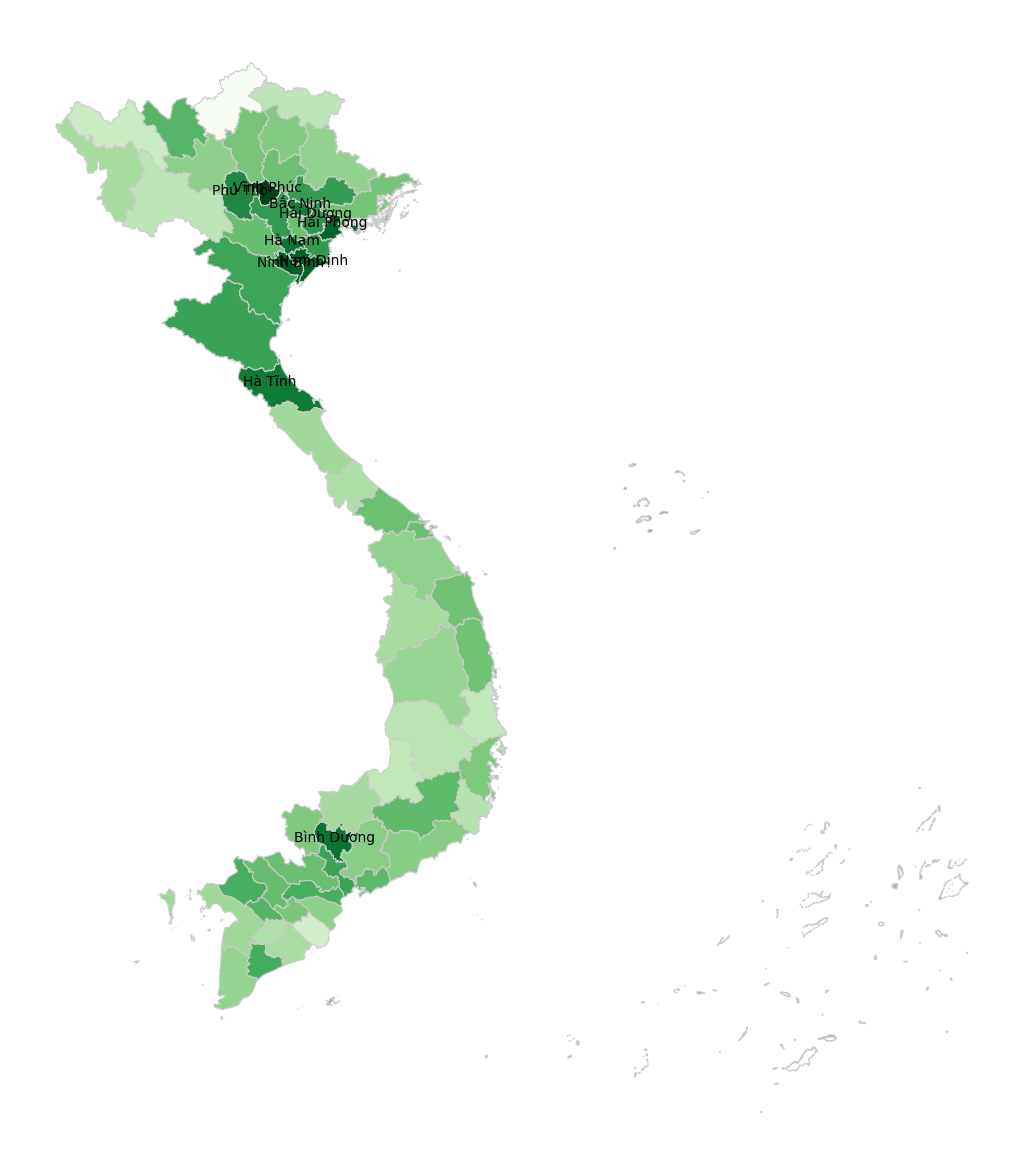

In [65]:
draw_map('Score_avg')

HEATMAP STD_SCORE IN VN 

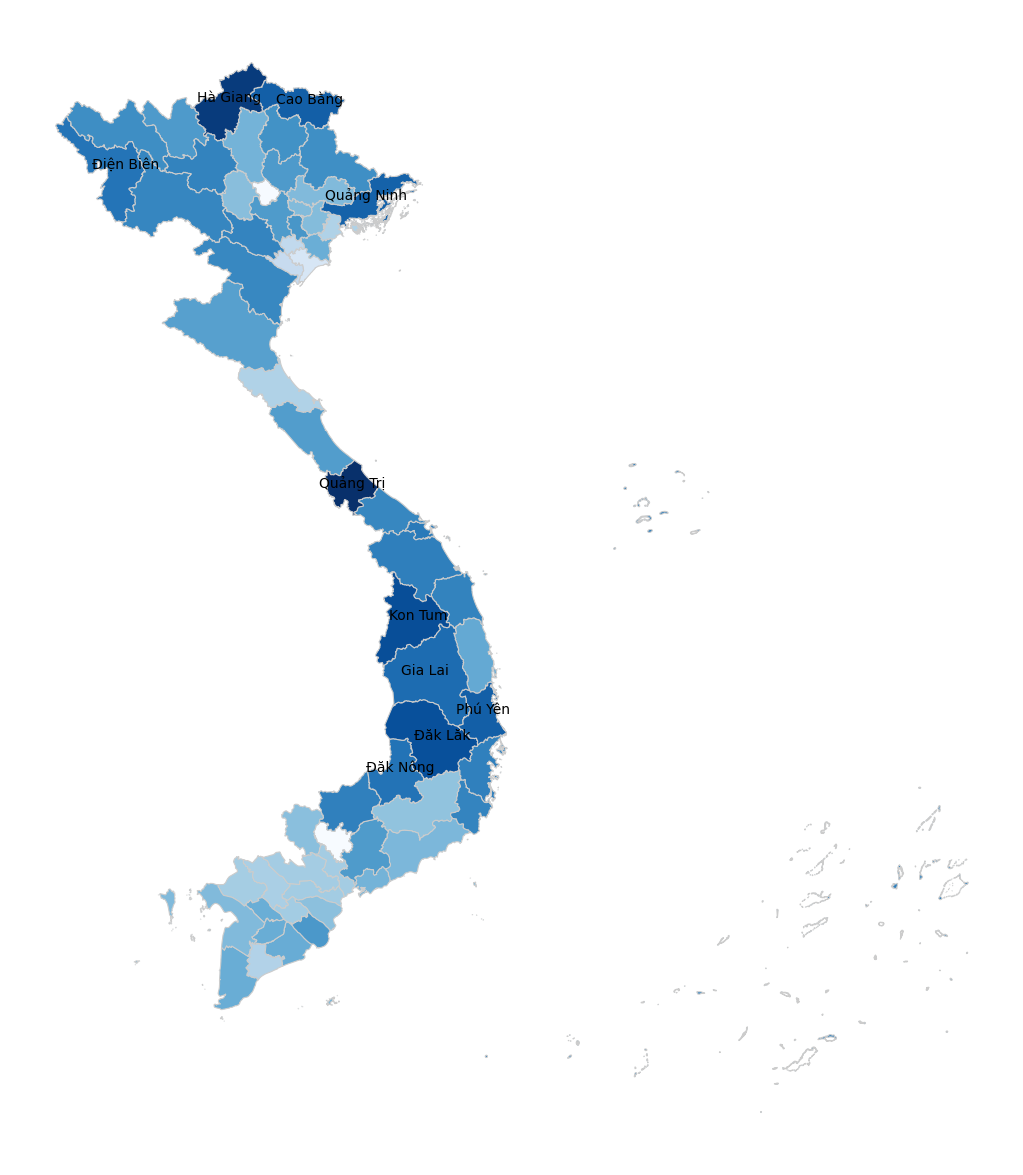

In [66]:
draw_map('Score_std')

HEATMAP TOP_SCORE (>=27) IN VN 

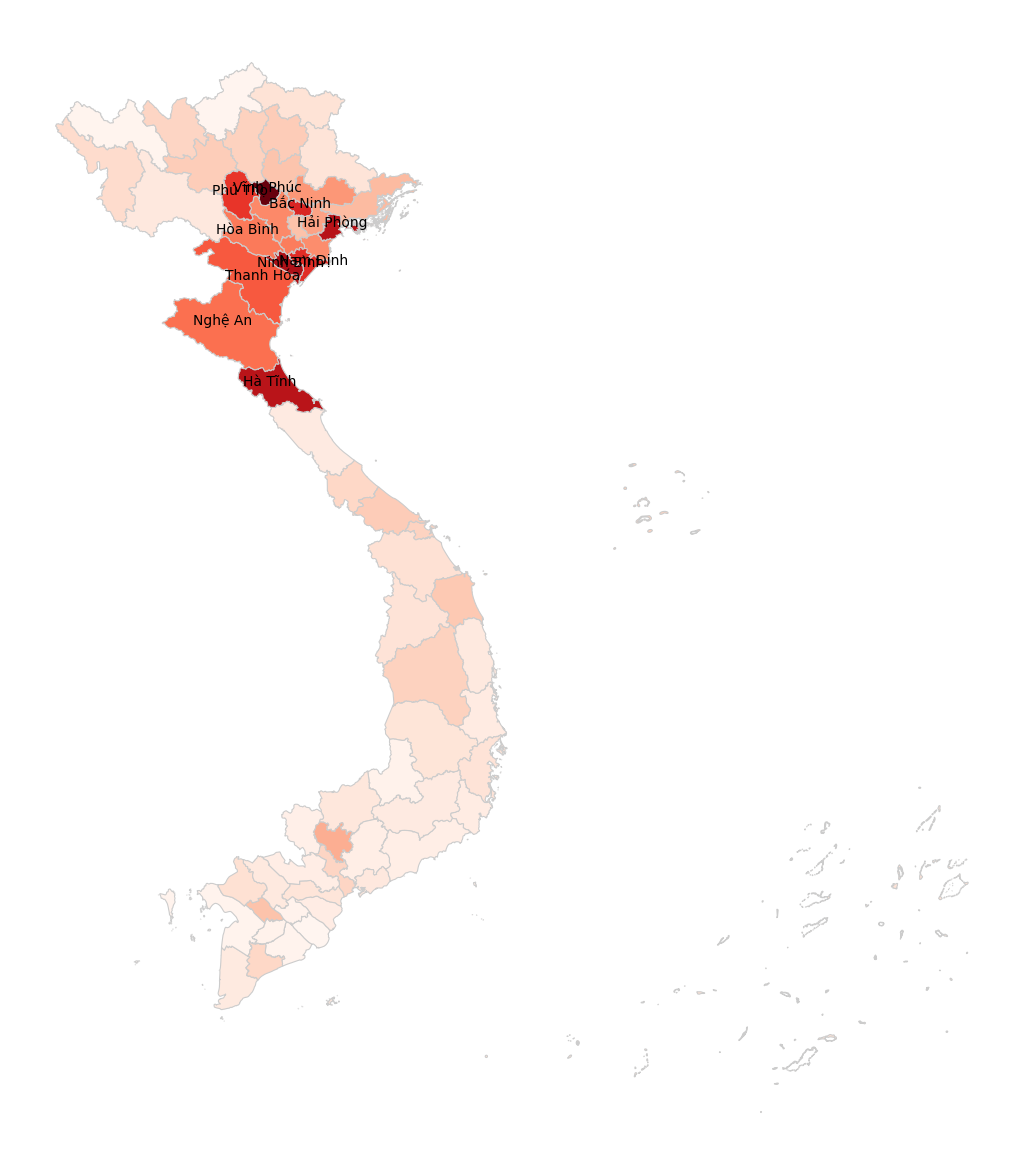

In [68]:
draw_map('Score_>=27')